In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../")

In [2]:
df = pd.read_csv("../data/processed/cleaned_data.csv")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1888\2273959617.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/cleaned_data.csv")


,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
from src.modeling.baseline import ClaimSeverityModel

severity_model = ClaimSeverityModel(df)
result = severity_model.train_model()

print("Claim Severity Model")
print("RMSE:", result["rmse"])
print("R²:", result["r2"])


Claim Severity Model
RMSE: 35047.92881771098
R²: 0.01790379509284956


In [4]:
from src.modeling.tree_model import ClaimSeverityTreeModel

tree_model = ClaimSeverityTreeModel(df)
tree_result = tree_model.train()

print("Random Forest RMSE:", tree_result["rmse"])
print("Random Forest R²:", tree_result["r2"])


Random Forest RMSE: 36636.818940546706
Random Forest R²: -0.07316088017826106


In [6]:
from src.modeling.xgboost import ClaimSeverityTreeModel

xgb_model = ClaimSeverityTreeModel(df)
xgb_result = xgb_model.train()

print("XGBoost RMSE:", xgb_result["rmse"])
print("XGBoost R²:", xgb_result["r2"])


XGBoost RMSE: 36079.74473535799
XGBoost R²: -0.040773507895615735


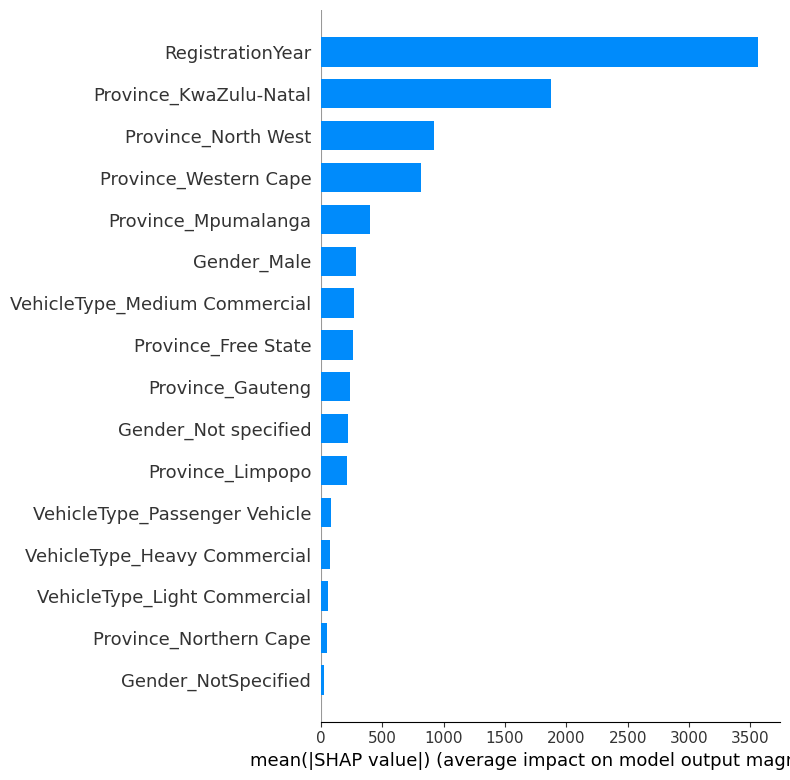

In [11]:
import shap
import pandas as pd

# Make sure X is clean
X = xgb_result["X_test"].copy()
X = X.reset_index(drop=True)
X = X.astype(float)

model = xgb_result["model"]

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")
